In [1]:
%load_ext autoreload
%autoreload 2

import train

In [2]:
get_data = train.GetData()

100%|██████████| 782/782 [01:34<00:00,  8.27it/s]


In [9]:
data_gen = get_data.get_data(**{'n_epochs': 1, 'batches_per_epoch': None})

In [11]:
bert = train.BertClassifier()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
loss_vals, accs = train.train(bert, data_gen)

100%|██████████| 782/782 [07:02<00:00,  1.85it/s, acc=0.8, loss=0.352, gpu mem=27.6 GiB]  


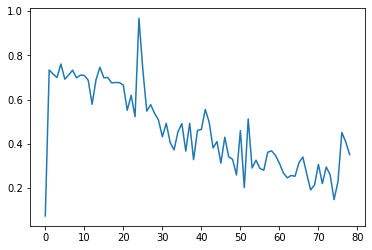

In [13]:
import matplotlib.pyplot as plt
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals])

In [15]:
loss_vals_2, accs_2 = train.train(bert, data_gen)

100%|██████████| 782/782 [07:03<00:00,  1.85it/s, acc=0.844, loss=0.312, gpu mem=27.6 GiB]


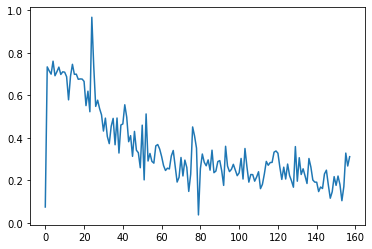

In [16]:
plt.plot([loss_tensor.cpu().detach().numpy() for loss_tensor in loss_vals + loss_vals_2])

In [17]:
train.save(bert)